In [1]:
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from glob import glob
from sklearn.utils import resample

In [2]:
import pymbar
sys.path.append("/Users/van/Scripts/")
from mbar_pmf import mbar_pmf

In [3]:
pwd

'/Users/van/website/CodingNotes/raw_data/claisen/pm3/mbar'

In [4]:
n_windows = 21 
val_kn = []
for i in range(n_windows):
    fnames = sorted(glob('../%02d/step6.0?_equilibration.cv' % i))
    arrays = [np.loadtxt(f, usecols=1)[::] for f in fnames[:]]
    val_kn.append(np.concatenate(arrays))
val0_k = np.linspace(-2.00, 2.00, n_windows)
K_k = np.ones(n_windows) * 300.0
val_min = -2.00
val_max = 2.00
nbins = n_windows - 1

In [5]:
for i in range(n_windows):
    print("Window %02d:" % i, pymbar.timeseries.subsampleCorrelatedData(val_kn[i], conservative=True))

Window 00: range(0, 1000)
Window 01: range(0, 1000)
Window 02: range(0, 1000)
Window 03: range(0, 1000)
Window 04: range(0, 1000)
Window 05: range(0, 1000)
Window 06: range(0, 1000)
Window 07: range(0, 1000)
Window 08: range(0, 1000)
Window 09: range(0, 1000)
Window 10: range(0, 1000)
Window 11: range(0, 1000)
Window 12: range(0, 1000)
Window 13: range(0, 1000)
Window 14: range(0, 1000)
Window 15: range(0, 1000)
Window 16: range(0, 1000)
Window 17: range(0, 1000)
Window 18: range(0, 1000)
Window 19: range(0, 1000)
Window 20: range(0, 1000)


In [6]:
mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0)

K (total states) = 21, total samples = 21000
N_k = 
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000]
There are 21 states with samples.
Initial dimensionless free energies with method BAR
f_k = 
[ 0.          1.23072943  1.90991958  3.98925049  6.56050668 11.49828531
 18.18114861 27.78548643 40.68764472 56.33533948 76.12567358 96.53454367
 95.43924429 82.33588689 70.84715207 61.48702356 53.86286496 48.08497101
 43.73961074 41.62979001 40.22636601]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 3.5123e-08, Newton-Raphson gradient norm is 2.0874e-21
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 2.9329e-08, Newton-Raphson gradient norm is 7.8886e-23
Choosing self-consistent iteration for lower gradient on iteration 1
self consistent iteration gradient norm is 2.4564e-08, Newton-Raphson gradient norm is 1

In [7]:
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins)
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, uncertainties='from-specified', pmf_reference=f_i[:20].argmin())
np.savetxt("freefile_mbar", np.column_stack((bin_centers, f_i, df_i)))

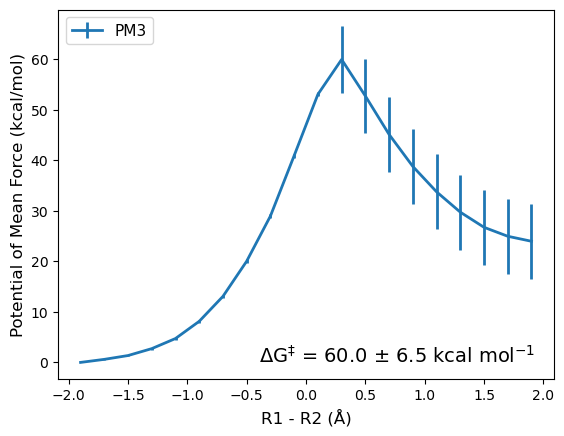

In [8]:
initial = np.loadtxt('freefile_mbar' )

bar=float(np.round(initial[:,1].max() - initial[:10,1].min(),1))
err=float(np.round(initial[initial[:,1].argmax()][2],1))

plt.errorbar(initial[:,0], initial[:,1] - initial[:10,1].min(), yerr=initial[:,2], linewidth=2, label="PM3")
plt.text(-0.4, 0,'$\Delta$G$^\ddag$ = %s $\pm$ %s kcal mol$^{-1}$' % (bar, err), fontsize=14)

plt.xlabel("R1 - R2 (Å)", fontsize=12)
plt.ylabel("Potential of Mean Force (kcal/mol)", fontsize=12)
plt.legend(loc=2, fontsize=11)

plt.savefig("claisen_pmf.png", dpi=300)
plt.show()